## DataFestAfrica Hackathon 2024: Improving  Academic Outcome For Secondary Education

## Introduction

An important general concern all over the African continent has been the sub-par quality of elementary and secondary education which has been further highlighted by the recent push to Computer-Based tests for students in ultimate classes (especially SSS3). In fairness, there has been some action taken by CSOs, governments and other bodies to improve the quality of education, and by extension, students’ performance.

Recent statistics from JAMB (a Nigerian pre-tertiary examination governing body) shows that 76% (approx. 4 out of 5) of students who participated in the 2024 UTME scored less than 200 (50%). This interesting insight emphasizes the need to find proactive solutions to this problem.
 ## Deliverables
Analytical Models: Present the predictive models (if any) and analysis performed on the data.

Final Solution: Build a solution (report, app, visual, web page etc) that highlights the key insights, shows trends and correlations, and provides actionable recommendations for stakeholders to improve the performance of candidates

## Preliminary Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,4)
pd.set_option('display.max_columns', 30)
%matplotlib inline

from google.colab import auth
from googleapiclient.discovery import build

# Authenticate
auth.authenticate_user()

# Create client
service = build('sheets', 'v4')

# Specify spreadsheet and range
spreadsheet_id = '1bdywDzhqfDHut36grVDXjEkxYsm7YX_66sLYOyHh7w4'
range_name = f'Form responses 1!A1:U'

# Get data
response = service.spreadsheets().values().get(
    spreadsheetId=spreadsheet_id, range=range_name).execute()
data = response.get('values', [])

#### Loading the Dataset

In [2]:
# Convert to Pandas DataFrame
online_review = pd.DataFrame(data[1:], columns=data[0])

In [3]:
online_review = online_review.iloc[:,1:]
online_review.head()

,Gender,Age,School,Exam,Location,Education,Guardians Education,Main academy challenge,Non-primary academy challenge,Exam readiness,Education resources,CBT technical issues,Exam preparation,Exam malpractice,After school study,Exam guidance,Exam confidence,Health issues,Family support,Recommendation
0,Female,18-20 years,Private School,WAEC,Urban area,Graduated secondary school,"Tertiary education (e.g., university, polytech...",Lack of adequate study materials,"Poor exam facilities (e.g., overcrowded exam h...",Very well prepared,"Extra tutoring or coaching, Access to more stu...","No, never",Extremely stressful,No,Every day,Somewhat easy to access,Very confident,No,Very supportive,Access to more study materials
1,Male,21-23 years,Public School,Both WAEC and JAMB,Rural area,Graduated secondary school,Secondary education,Large syllabus to cover,"Limited access to electricity or internet, Poo...",Somewhat prepared,"Access to more study materials (e.g., textbook...","No, never",Moderately stressful,No,Occasionally,Somewhat easy to access,Very confident,No,Somewhat supportive,Large syllabus
2,Male,18-20 years,Public School,Both WAEC and JAMB,Rural area,Graduated secondary school,"Tertiary education (e.g., university, polytech...","Lack of adequate study materials, Large syllab...","Poor transportation to exam centers, Poor exam...",Not well prepared,"Extra tutoring or coaching, Access to more stu...","Yes, occasionally",Moderately stressful,Yes,A few times a week,Somewhat easy to access,Not confident,No,Somewhat supportive,Cub examination malpractice\nAnd adequate invi...
3,Male,21-23 years,Public School,Both WAEC and JAMB,Semi-urban area,Graduated secondary school,No formal education,"Difficulty understanding certain subjects, Lac...","Financial constraints (e.g., paying for exams,...",Very well prepared,"Extra tutoring or coaching, Access to more stu...","Yes, occasionally",Moderately stressful,Prefer not to say,Rarely or never,Not available at all,Somewhat confident,Yes,Somewhat supportive,More insight and information about jamb /waec ...
4,Female,15-17 years,Public School,WAEC,Rural area,Graduated secondary school,"Tertiary education (e.g., university, polytech...","Difficulty understanding certain subjects, Lar...",,Not well prepared,"Extra tutoring or coaching, Study groups with ...","No, never",Moderately stressful,Yes,A few times a week,Somewhat easy to access,Not confident,No,Very supportive,To create a learning group among the students ...


#### Assessing the Dataset

In [4]:
# Overview of data shape and composition
print(online_review.shape)
print(online_review.dtypes)

(30, 20)
Gender                           object
Age                              object
School                           object
Exam                             object
Location                         object
Education                        object
Guardians Education              object
Main academy challenge           object
Non-primary academy challenge    object
Exam readiness                   object
Education resources              object
CBT technical issues             object
Exam preparation                 object
Exam malpractice                 object
After school study               object
Exam guidance                    object
Exam confidence                  object
Health issues                    object
Family support                   object
Recommendation                   object
dtype: object


In [5]:
# Descriptive statistics
online_review.describe()

,Gender,Age,School,Exam,Location,Education,Guardians Education,Main academy challenge,Non-primary academy challenge,Exam readiness,Education resources,CBT technical issues,Exam preparation,Exam malpractice,After school study,Exam guidance,Exam confidence,Health issues,Family support,Recommendation
count,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,20
unique,2,4,3,5,3,2,4,17,15,3,14,4,3,3,4,4,4,3,3,20
top,Female,18-20 years,Private School,Both WAEC and JAMB,Urban area,Graduated secondary school,"Tertiary education (e.g., university, polytech...",Time management issues,"Poor exam facilities (e.g., overcrowded exam h...",Very well prepared,"Access to more study materials (e.g., textbook...","No, never",Moderately stressful,No,Every day,Somewhat easy to access,Very confident,No,Very supportive,Access to more study materials
freq,21,12,18,21,14,29,19,3,5,13,5,14,21,19,11,18,16,19,22,1


In [6]:
online_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Gender                         30 non-null     object
 1   Age                            30 non-null     object
 2   School                         30 non-null     object
 3   Exam                           30 non-null     object
 4   Location                       30 non-null     object
 5   Education                      30 non-null     object
 6   Guardians Education            30 non-null     object
 7   Main academy challenge         30 non-null     object
 8   Non-primary academy challenge  30 non-null     object
 9   Exam readiness                 30 non-null     object
 10  Education resources            30 non-null     object
 11  CBT technical issues           30 non-null     object
 12  Exam preparation               30 non-null     object
 13  Exam ma

In [7]:
# Fill missing values in other columns with mode
for column in online_review.columns:
    if column != 'Recommendation':
        mode_value = online_review[column].mode()
        if not mode_value.empty:
            # Use the first mode value if there are multiple modes
            online_review[column].fillna(mode_value[0], inplace=True)

# Fill missing values in Recommendation with 'No comment'
online_review['Recommendation'].fillna('No comment', inplace=True)

<ipython-input-7-7eddcd49e73e>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  online_review[column].fillna(mode_value[0], inplace=True)
<ipython-input-7-7eddcd49e73e>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [8]:
online_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Gender                         30 non-null     object
 1   Age                            30 non-null     object
 2   School                         30 non-null     object
 3   Exam                           30 non-null     object
 4   Location                       30 non-null     object
 5   Education                      30 non-null     object
 6   Guardians Education            30 non-null     object
 7   Main academy challenge         30 non-null     object
 8   Non-primary academy challenge  30 non-null     object
 9   Exam readiness                 30 non-null     object
 10  Education resources            30 non-null     object
 11  CBT technical issues           30 non-null     object
 12  Exam preparation               30 non-null     object
 13  Exam ma

In [9]:
# # convert the cols above into ordered categorical types
# ordinal_var_dict = {'Exam readiness': ['Not well prepared','Somewhat prepared','Very well prepared'],
#                     'Exam preparation': ['Not stressful','Moderately stressful','Extremely stressful'],
#                     'Exam confidence': ['Not confident','Somewhat confident','Very confident'],
#                   'Family support': ['Not supportive', 'Somewhat supportive', 'Very supportive']}

# for var in ordinal_var_dict:
#     ordered_var = pd.api.types.CategoricalDtype(ordered = True,
#                                                 categories = ordinal_var_dict[var])
#     online_review[var] = online_review[var].astype(ordered_var)

In [10]:
online_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Gender                         30 non-null     object
 1   Age                            30 non-null     object
 2   School                         30 non-null     object
 3   Exam                           30 non-null     object
 4   Location                       30 non-null     object
 5   Education                      30 non-null     object
 6   Guardians Education            30 non-null     object
 7   Main academy challenge         30 non-null     object
 8   Non-primary academy challenge  30 non-null     object
 9   Exam readiness                 30 non-null     object
 10  Education resources            30 non-null     object
 11  CBT technical issues           30 non-null     object
 12  Exam preparation               30 non-null     object
 13  Exam ma

In [11]:
online_review.describe()

,Gender,Age,School,Exam,Location,Education,Guardians Education,Main academy challenge,Non-primary academy challenge,Exam readiness,Education resources,CBT technical issues,Exam preparation,Exam malpractice,After school study,Exam guidance,Exam confidence,Health issues,Family support,Recommendation
count,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
unique,2,4,3,5,3,2,4,17,15,3,14,4,3,3,4,4,4,3,3,21
top,Female,18-20 years,Private School,Both WAEC and JAMB,Urban area,Graduated secondary school,"Tertiary education (e.g., university, polytech...",Time management issues,"Poor exam facilities (e.g., overcrowded exam h...",Very well prepared,"Access to more study materials (e.g., textbook...","No, never",Moderately stressful,No,Every day,Somewhat easy to access,Very confident,No,Very supportive,No comment
freq,21,12,18,21,14,29,19,3,5,13,5,14,21,19,11,18,16,19,22,10


Based on the text questions these are the frequently occuring words

In [12]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Ensure you have necessary nltk packages
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Function to preprocess text and generate word cloud
def generate_wordcloud(df, column_name, title="Word Cloud"):
    """
    Preprocesses the text from the specified column of the DataFrame and generates a word cloud.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column_name (str): The column name from which the word cloud will be generated.
    title (str): The title of the word cloud plot (default: 'Word Cloud').

    Returns:
    None: Displays the word cloud.
    """

    # Function to preprocess text
    def preprocess_text(text):
        # Convert to lowercase
        text = text.lower()

        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))

        # Tokenize words
        tokens = word_tokenize(text)

        # Remove stopwords
        tokens = [word for word in tokens if word not in stopwords.words('english')]

        # Lemmatize tokens
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

        return tokens

    # Apply preprocessing to the specified column
    df['processed_text'] = df[column_name].apply(lambda x: preprocess_text(str(x)))

    # Flatten the list of lists into a single list of words
    all_words = [word for text in df['processed_text'] for word in text]

    # Create a frequency dictionary
    word_freq = Counter(all_words)

    # Generate word cloud
    wordcloud = WordCloud(width=600, height=300,  background_color='white',  max_words=100,  contour_color='black',  colormap='viridis',  stopwords=STOPWORDS).generate_from_frequencies(word_freq)

    # Display the word cloud
    plt.figure(figsize=(16, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


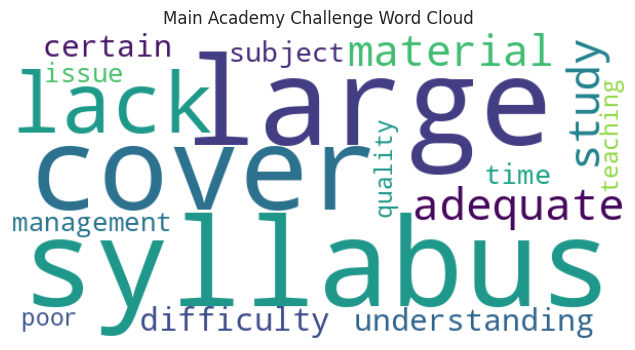

<Figure size 1000x400 with 0 Axes>

In [13]:
generate_wordcloud(online_review, 'Main academy challenge', title="Main Academy Challenge Word Cloud")
#  Save the figure
plt.savefig('/content/Main_academy_challenge.png', dpi=300, bbox_inches='tight')

Main Academy Challenge:

The dominant words in this chart are "large," "syllabus," "cover," "lack," and "adequate". Which suggests that students find the syllabus overwhelming and difficult to cover, and there's a lack of adequate study materials to help them manage their coursecontent.

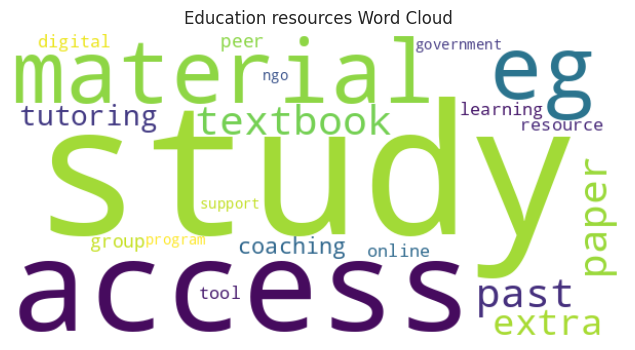

<Figure size 1000x400 with 0 Axes>

In [14]:
generate_wordcloud(online_review, 'Education resources', title="Education resources Word Cloud")

#  Save the figure
plt.savefig('/content/Education resources.png', dpi=300, bbox_inches='tight')

Education Resources:

Key words like "study," "access," "material," "textbook," and "extra" point to a significant focus on access to educational resources. This indicates that students are either reliant on or struggling with accessing study materials such as textbooks, past papers, or extra tutoring.

In [15]:
# generate_wordcloud(online_review, 'Recommendation', title="Recommendation Word Cloud")

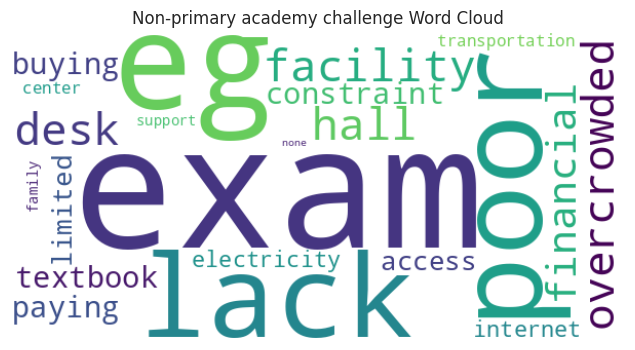

<Figure size 1000x400 with 0 Axes>

In [16]:
generate_wordcloud(online_review, 'Non-primary academy challenge', title="Non-primary academy challenge Word Cloud")
#  Save the figure
plt.savefig('/content/Non-primary_academy_challenge.png', dpi=300, bbox_inches='tight');

Non-primary Academy Challenge:

Words like "exam," "poor," "lack," "facility," and "constraint" highlight that students face difficulties related to exam facilities, such as overcrowded exam halls, financial constraints, and poor infrastructure. Access to exam centers and electricity/internet issues are also notable challenges.

## Bivariate Exploration

In [17]:
# CHecking for the number of unique value in each variable
online_review.iloc[:,0:-1].nunique()

,0
Gender,2
Age,4
School,3
Exam,5
Location,3
Education,2
Guardians Education,4
Main academy challenge,17
Non-primary academy challenge,15
Exam readiness,3


### Interactive Contigency Table

In [18]:
import ipywidgets as widgets
from IPython.display import display

# Dropdown options
dropdown_var1 = widgets.Dropdown(
    options=['Gender', 'School', 'Location', 'Family support', 'Health issues', 'Age', 'Exam preparation', 'Exam readiness'],
    value='Exam readiness',
    description='Row Variable:',
)

dropdown_var2 = widgets.Dropdown(
    options=['Exam confidence', 'Exam readiness', 'Exam preparation'],
    value='Exam confidence',
    description='Column Variable:',
)

# Function to update crosstab with color intensity based on values' size
def update_crosstab(var1, var2):
    # Compute crosstab between the selected variables
    multivariate_table = round(pd.crosstab(online_review[var1], online_review[var2], normalize='index'), 2) * 100

    # Apply a background gradient to the crosstab to reflect the size of the values
    styled_table = multivariate_table.style.background_gradient(cmap='Greens')

    # Display the styled crosstab
    display(styled_table)

# Observe changes in dropdowns and update the colorful crosstab
widgets.interact(update_crosstab, var1=dropdown_var1, var2=dropdown_var2)

interactive(children=(Dropdown(description='Row Variable:', index=7, options=('Gender', 'School', 'Location', …

<function __main__.update_crosstab(var1, var2)>

This analysis compares feature like Gender, scholl, location, family support, Age, Health issues, Exam readiness, and Exam preparation with Exam confidence, to see the.

Partcularly, the relationship between Exam readiness and confidence shows the following response as seen above.

**Insights**

- **Misalignment between Readiness and Confidence**: Many underprepared students are overly confident, which may harm their exam performance.
- **Balanced Confidence for Somewhat Prepared Students**: These students show varied confidence levels, indicating a realistic assessment of their readiness.
- **Direct Correlation for Well-Prepared Students**: Well-prepared students are highly confident, demonstrating the positive impact of thorough preparation.

**Recommendations**

- **Address Overconfidence in Underprepared Students**: Use self-assessment tools and practice exams to help these students accurately gauge their readiness.
- **Provide Additional Support for Somewhat Prepared Students**: Offer extra tutoring, study materials, and focused revision sessions to boost their readiness and confidence.
- **Focus on Early Intervention for Unprepared and Unconfident Students**: Provide targeted workshops, stress management programs, and academic counseling to improve their readiness and confidence.
- **Reinforce Effective Preparation**: Encourage consistent studying, access to past questions, and study group formation to enhance overall confidence.

### Model Building

In [19]:
!pip install kmodes

In [20]:
from kmodes.kmodes import KModes

In [21]:
online_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Gender                         30 non-null     object
 1   Age                            30 non-null     object
 2   School                         30 non-null     object
 3   Exam                           30 non-null     object
 4   Location                       30 non-null     object
 5   Education                      30 non-null     object
 6   Guardians Education            30 non-null     object
 7   Main academy challenge         30 non-null     object
 8   Non-primary academy challenge  30 non-null     object
 9   Exam readiness                 30 non-null     object
 10  Education resources            30 non-null     object
 11  CBT technical issues           30 non-null     object
 12  Exam preparation               30 non-null     object
 13  Exam ma

In [22]:
# Select relevant columns
selected_columns = ['Gender', 'Age','School','Exam','Location', 'Guardians Education','Exam readiness' ,'Exam preparation','After school study',	'Exam guidance','Exam confidence','Health issues','Family support']
df_selected = online_review[selected_columns]

# Convert columns to categorical data type
for col in df_selected.columns:
    df_selected[col] = df_selected[col].astype('category')

# Initialize K-Modes clustering
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)

# Fit the model and assign clusters
clusters = km.fit_predict(df_selected)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8, cost: 130.0
Run 1, iteration: 2/100, moves: 0, cost: 130.0
Init: initializing centroids


<ipython-input-22-9d674e673cd2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = df_selected[col].astype('category')
<ipython-input-22-9d674e673cd2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = df_selected[col].astype('category')
<ipython-input-22-9d674e673cd2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3, cost: 131.0
Run 2, iteration: 2/100, moves: 0, cost: 131.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5, cost: 133.0
Run 3, iteration: 2/100, moves: 5, cost: 128.0
Run 3, iteration: 3/100, moves: 2, cost: 127.0
Run 3, iteration: 4/100, moves: 0, cost: 127.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 6, cost: 132.0
Run 4, iteration: 2/100, moves: 0, cost: 132.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3, cost: 138.0
Best run was number 3


In [23]:
# Add cluster labels to the selected data
df_selected['Cluster'] = clusters

# Save the preprocessed data and model if needed
df_selected.to_csv('clustered_data_selected_columns.csv', index=False)

<ipython-input-23-0c287b17cefc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = clusters


In [24]:
# Define a function to generate recommendations based on cluster profiles
def generate_recommendations(cluster_label):
    if cluster_label == 0:
        return "Needs foundational support in exam preparation, increased access to exam resources, and stress management strategies"
    elif cluster_label == 1:
        return "Requires stress management and more advanced tools for exam preparation to maintain high performance and confidence levels."
    elif cluster_label == 2:
        return "Benefits from personalized preparation plans and confidence-building programs, with an emphasis on consistent study routines and leveraging family support."
    else:
        return "No specific recommendation."

# Apply the recommendation function to the clusters
df_selected['Recommendation'] = df_selected['Cluster'].apply(generate_recommendations)

# Save the updated DataFrame with recommendations
df_selected.to_csv('clustered_with_recommendations.csv', index=False)

<ipython-input-24-537302f028ce>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Recommendation'] = df_selected['Cluster'].apply(generate_recommendations)


In [25]:
df_selected.head()

,Gender,Age,School,Exam,Location,Guardians Education,Exam readiness,Exam preparation,After school study,Exam guidance,Exam confidence,Health issues,Family support,Cluster,Recommendation
0,Female,18-20 years,Private School,WAEC,Urban area,"Tertiary education (e.g., university, polytech...",Very well prepared,Extremely stressful,Every day,Somewhat easy to access,Very confident,No,Very supportive,1,Requires stress management and more advanced t...
1,Male,21-23 years,Public School,Both WAEC and JAMB,Rural area,Secondary education,Somewhat prepared,Moderately stressful,Occasionally,Somewhat easy to access,Very confident,No,Somewhat supportive,0,Needs foundational support in exam preparation...
2,Male,18-20 years,Public School,Both WAEC and JAMB,Rural area,"Tertiary education (e.g., university, polytech...",Not well prepared,Moderately stressful,A few times a week,Somewhat easy to access,Not confident,No,Somewhat supportive,0,Needs foundational support in exam preparation...
3,Male,21-23 years,Public School,Both WAEC and JAMB,Semi-urban area,No formal education,Very well prepared,Moderately stressful,Rarely or never,Not available at all,Somewhat confident,Yes,Somewhat supportive,0,Needs foundational support in exam preparation...
4,Female,15-17 years,Public School,WAEC,Rural area,"Tertiary education (e.g., university, polytech...",Not well prepared,Moderately stressful,A few times a week,Somewhat easy to access,Not confident,No,Very supportive,0,Needs foundational support in exam preparation...


In [26]:
import pickle

# Save the clustered DataFrame to a pickle file
df_selected.to_pickle('clustered_data.pkl')

# Save the K-Modes model to a pickle file
with open('kmodes_model.pkl', 'wb') as file:
    pickle.dump(km, file)